In [1]:
#Import bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
#Wczytanie zbioru
df = pd.read_csv("dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Przygotowanie zbioru danych do analizy**

In [176]:
#Usunięcie kolumny z indeksami i kolumny track_id
df = df.drop(df.columns[0], axis=1)

Sprawdzenie, czy są rekordy z pustymi danymi:

In [177]:
#Liczba rekordów z brakującymi danymi
df.isnull().any(axis=1).sum()

1

In [178]:
#Wyświetlenie rekordu z brakującymi danymi
df[df.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [179]:
#Usunięcie rekordu z brakującymi danymi
df = df.drop(65900)

Sprawdzenie, czy rekordy mają spójne wartości we wszystkich kolumnach:

In [180]:
#Liczba rekordów, które nie mają popularity w przedziale od 0 do 100
df[~df['popularity'].between(0, 100)].sum(axis=1)

,0


In [181]:
#Sprawdzenie, czy są rekordy, które mają czas trwania utworu mniejszy lub równy zero
(df['duration_ms'] <= 0).sum()

0

In [182]:
#Liczba rekordów, które nie mają explicit typu boolean
mask = ~df['explicit'].isin([True, False])
mask.sum()

0

In [183]:
#Liczba rekordów, które nie mają danceability, energy, speechiness, acousticness, instrumentalness, liveness i valence w przedziale od 0 do 1
columns_to_check = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mask_out_of_range = (df[columns_to_check] < 0) | (df[columns_to_check] > 1)
mask_out_of_range.any(axis=1).sum()

0

In [184]:
#Liczba rekordów, które mają tempo poniżej zera
(df['tempo'] < 0).sum()

0

In [185]:
#Liczba rekordów, które nie mają time_signature w przedziale od 3 do 7
mask = ~df['time_signature'].isin([3,4,5,6,7])
mask.sum()

1136

In [186]:
#Usunięcie rekordów, które nie mają time_signature w przedziale od 3 do 7
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

In [187]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie key
mask = ~df['key'].isin([-1,0,1,2,3,4,5,6,7,8,9,10,11])
mask.sum()

0

In [188]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie mode
mask = ~df['mode'].isin([0,1])
mask.sum()

0

**Analiza zbioru**

Korelacje między cechami:

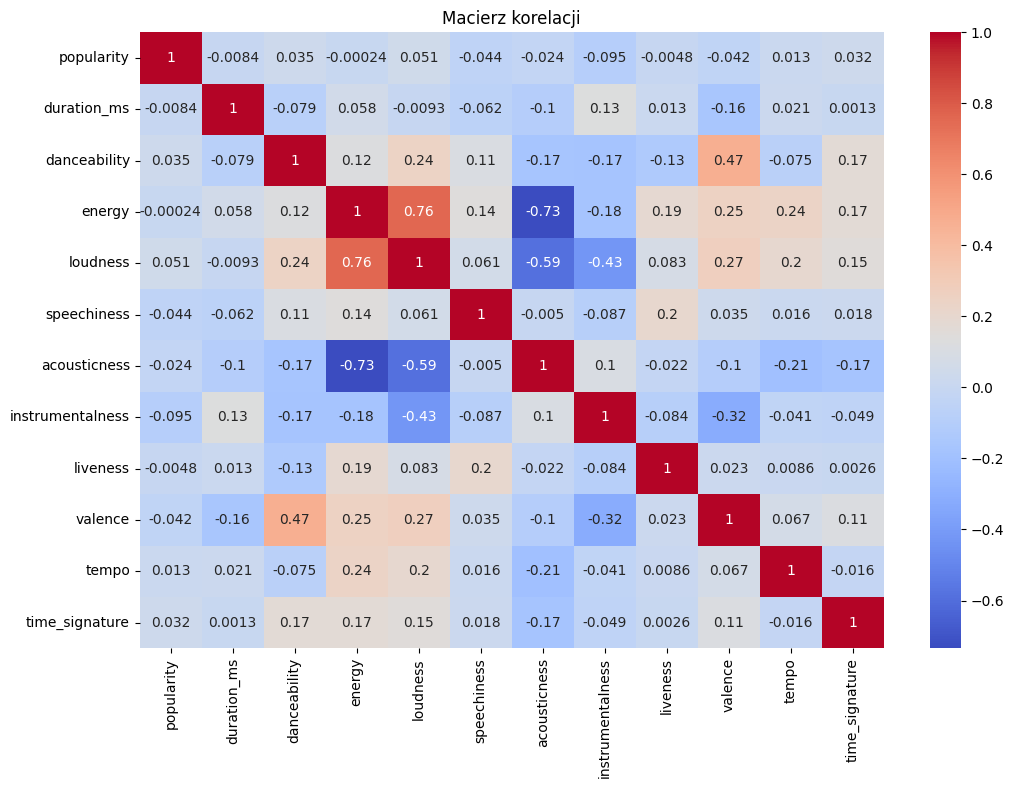

In [189]:
#Macierz korelacji
df_corr = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

Analiza macierzy korelacji:
1. Silną korelację ujemną (-0.73) mają zmienne energy i acousticness. Zmienna energy jest miarą od 0.0 do 1.0 i reprezentuje percepcyjną miarę intensywności i aktywności utworu. Zmienna acousticness jest miarą zaufania od 0.0 do 1.0, która określa, czy utwór jest akustyczny. 1.0 oznacza wysokie zaufanie, że utwór jest akustyczny. Korelacja ta sugeruje, że utwory mające lepszą akustykę są zazwyczaj mniej energiczne.

2. Wyraźną korelację ujemną (-0.59) mają zmienne acousticness i loudness. Zmienna loudness wyraża głośność utworu w decybelach. Korelacja ta sugeruje, że utwory cichsze mają z reguły lepszą akustykę.

3. Silną korelację dodatnią (0.76) mają zmienne energy i loudness. Taka korelacja sugeruje, że utwory bardziej energiczne i intensywne są zazwyczaj głośniejsze.

4. Umiarkowaną korelację dodatnią (0.47) mają zmienne danceability i valence. Zmienna danceability opisuje, jak odpowiedni jest utwór do tańca w oparciu o kombinację różnych elementów muzycznych. Wartość 0.0 oznacza najmniejszą taneczność, a 1.0 największą taneczność. Zmienna valence jest miarą od 0.0 do 1.0 opisującą muzyczną pozytywność przekazywaną przez utwór. Utwory o wysokim valence brzmią bardziej pozytywnie, podczas gdy utwory o niskim valence brzmią bardziej negatywnie. Korelacja ta sugeruje, że utwory bardziej pozytywne są zwykle lepsze do tańczenia.

Procent utworów z wulgaryzmami dla każdego gatunku

In [190]:
explicit_percent = (
    df.groupby('track_genre')['explicit']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'explicit': 'explicit_percentage'})
)

explicit_percent_sorted = explicit_percent.sort_values(by='explicit_percentage', ascending=False)

for index, row in explicit_percent_sorted.iterrows():
    print(f"{row['track_genre']}: {row['explicit_percentage']:.2f}%")

comedy: 65.57%
emo: 46.59%
sad: 45.13%
j-dance: 39.07%
hardcore: 32.56%
hip-hop: 31.55%
funk: 30.32%
dancehall: 30.23%
metalcore: 29.31%
death-metal: 25.13%
latino: 24.97%
industrial: 23.49%
french: 22.01%
turkish: 21.89%
reggaeton: 21.24%
dance: 17.40%
chill: 17.20%
reggae: 16.75%
alternative: 16.43%
grindcore: 15.35%
electro: 15.25%
metal: 14.24%
latin: 13.33%
black-metal: 13.27%
german: 12.82%
happy: 12.55%
electronic: 12.05%
house: 10.70%
punk: 10.62%
edm: 10.61%
indie-pop: 10.58%
soul: 10.42%
groove: 9.73%
hardstyle: 9.63%
swedish: 9.56%
garage: 9.54%
dubstep: 9.54%
r-n-b: 8.69%
club: 8.57%
brazil: 8.44%
heavy-metal: 8.32%
indie: 8.29%
iranian: 8.27%
punk-rock: 8.02%
pop: 7.49%
dub: 7.41%
grunge: 7.24%
goth: 6.62%
alt-rock: 5.61%
anime: 5.44%
acoustic: 5.25%
progressive-house: 5.21%
k-pop: 4.93%
hard-rock: 4.91%
breakbeat: 4.80%
songwriter: 4.61%
singer-songwriter: 4.61%
trip-hop: 4.53%
party: 4.52%
synth-pop: 4.41%
rock: 4.30%
british: 3.94%
spanish: 3.81%
malay: 3.70%
power-pop:

Największy procent piosenek (65,57 %) z wulgaryzmami ma gatunek comedy. Na drugim miejscu jest gatunek emo (46,59 %), a na trzecim gatunek sad (45,13 %).

Spory procent piosenek z wulgaryzmami mają też takie gatunki, jak hip-hop, hardcore (gatunek wyrażający intensywne emocje w brzmieniu i tekstach) , czy j-dance (gatunek związany z japońską muzyką).

Można też zauważyć, że w zbiorze tym jest kilka piosenek z Disneya, które zawierają wulgaryzmy.

**Usuwanie punktów odstających**

In [192]:
# Funkcja do usuwania punktów odstających dla grupy
def remove_outliers(group, feature):
    Q1 = group[feature].quantile(0.25)  # 25 percentyl
    Q3 = group[feature].quantile(0.75)  # 75 percentyl
    IQR = Q3 - Q1                       # Przedział międzykwartylowy (IQR)
    lower_bound = Q1 - 1.5 * IQR        # Dolna granica
    upper_bound = Q3 + 1.5 * IQR        # Górna granica

    return group[(group[feature] >= lower_bound) & (group[feature] <= upper_bound)]

features_to_check = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feature in features_to_check:
    df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))

<ipython-input-192-bc1176f8d15e>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))
<ipython-input-192-bc1176f8d15e>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))
<ipython-input-192-bc1176f8d15e>:14: DeprecationWarning:

**Dodanie kolumny klasyfikującej długość utworu w kontekście gatunku**

In [193]:
stats = df.groupby('track_genre')['duration_ms'].agg(['median', 'quantile'])
stats['Q1'] = df.groupby('track_genre')['duration_ms'].quantile(0.25)
stats['Q3'] = df.groupby('track_genre')['duration_ms'].quantile(0.75)

def categorize_duration_by_genre(row, stats):
    genre = row['track_genre']
    duration = row['duration_ms']

    Q1 = stats.loc[genre, 'Q1']
    Q3 = stats.loc[genre, 'Q3']

    #0 - krótki utwór, 1 - średni utwór, 2 - długi utwór
    if duration < Q1:
        return 0
    elif Q1 <= duration <= Q3:
        return 1
    else:
        return 2

df['duration_category'] = df.apply(categorize_duration_by_genre, axis=1, args=(stats,))

**Standaryzacja**

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['duration_ms', 'loudness', 'tempo']] = scaler.fit_transform(df[['duration_ms', 'loudness', 'tempo']])

**Dodanie cech interakcji**

In [195]:
df['danceability_energy'] = df['danceability'] * df['energy']
df['danceability_valence'] = df['danceability'] * df['valence']
df['tempo_energy'] = df['tempo'] * df['energy']

**Zakodowanie kolumny explicit**

In [196]:
df['explicit'] = df['explicit'].astype(int)